In [334]:
import pandas as pd
import neuron
import numpy as np
import matplotlib.pyplot as plt

from utils import *

file_names = ['dff', 'swim', 'stimuli', 'centroids', 'MainReg', 'BrainRegions', 'BrainRegions_names', 'genes', 'gene_names'] # All files with data

data = processed_data_map # Get data that is pre-loaded in the load_data.py file
dff = data['dff']
swim = data['swim']
brain_regions = data['BrainRegions']

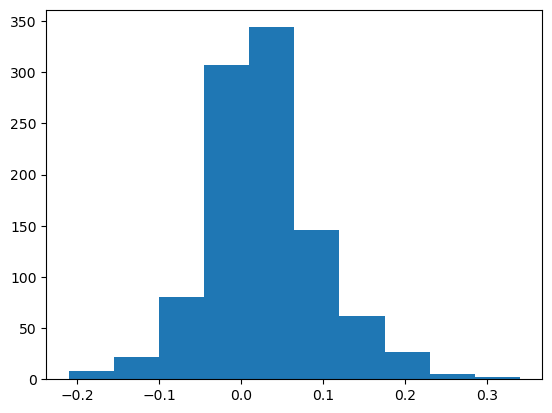

In [455]:
import seaborn as sns
new_dff = dff[::278]
def get_correlation(d):
    corr = np.zeros(len(d))
    p_values = []
    for i in range(len(d)):
        D = new_dff.to_numpy()
        statistic, p_value = correlation(D[i,:], swim)
        p_values.append(p_value)
        corr[i] = statistic
    return corr, p_values

max_corr, p_values = get_correlation(new_dff)
plt.hist(max_corr)
plt.show()

In [6]:
maxcorr_index = np.argmax(max_corr)
max_corr[maxcorr_index]

0.3400565813433571

In [7]:
print(max_corr.shape, new_dff.shape, maxcorr_index)

(1003,) (1003, 1376) 706


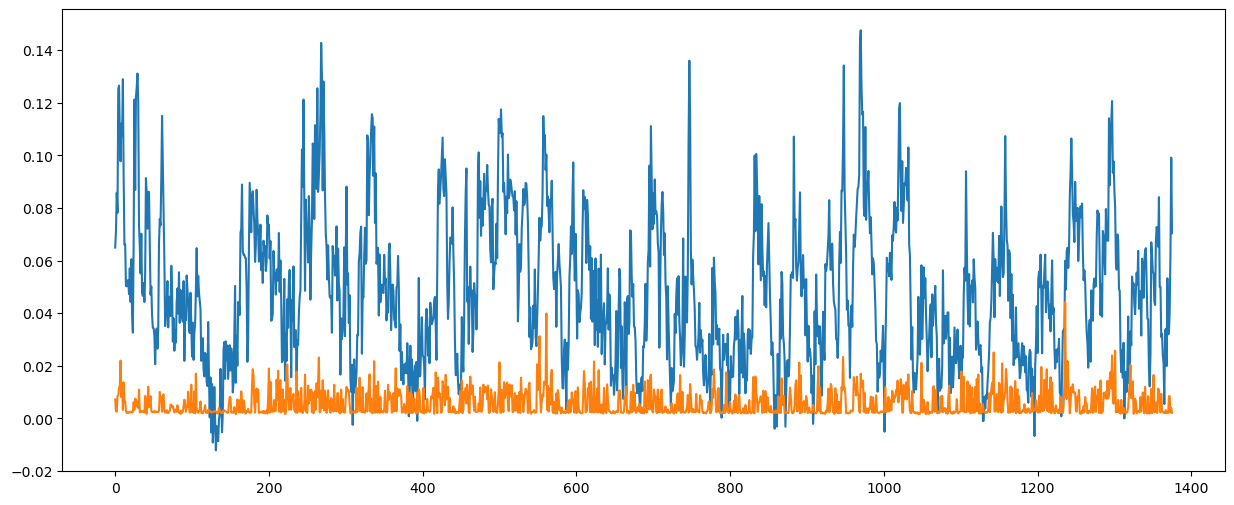

[0.06492936 0.07090241 0.08577016 ... 0.06277699 0.09909518 0.07040973]


In [302]:
plt.figure(figsize=(15,6))
plt.plot(new_dff.to_numpy()[maxcorr_index,:])
plt.plot(swim)
plt.show()
print(new_dff.to_numpy()[maxcorr_index,:])

In [12]:
tectum = brain_regions.to_numpy()[:, 97]

In [13]:
dgg = (brain_regions[0].values == True)

In [14]:
std = np.std(max_corr)
median = np.median(max_corr)
print(std, median)
centroids = data['centroids']
centroid_np = centroids.to_numpy()
centroid_np

0.07021152118806918 0.02164263127221055


array([[136, 259, 162],
       [132, 270, 173],
       [131, 280, 165],
       ...,
       [312, 325, 805],
       [301, 339, 790],
       [322, 342, 786]])

In [15]:
corr_thr = median + std
corr_thr2 = median + std + std
thr = corr_thr2
index_corr,  = np.where(max_corr > thr)
centroid_1 = centroid_np[:,1]
centroid_2 = centroid_np[:,2]*-1
centroid_2

array([-162, -173, -165, ..., -805, -790, -786])

In [16]:
centroid_3 = centroid_np[index_corr,1]
centroid_4 = centroid_np[index_corr,2]*-1

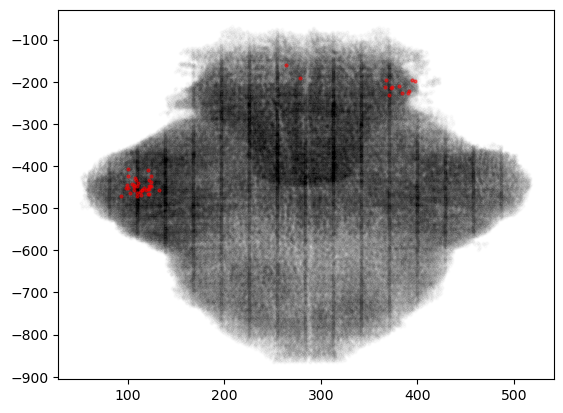

In [472]:
plt.scatter(centroid_1, centroid_2, s=4, c='k', alpha=0.01)
plt.scatter(centroid_3, centroid_4, s=4, c='r', alpha=0.5)

In [43]:
genes = pd.DataFrame(data['genes'].to_numpy(), columns=data['gene_names'][0].values)
genes['neurons'] = genes.index
to_plot_genes = genes[:5]
to_plot_genes
# x = np.arange(len(to_plot_genes))
# to_plot_genes.plot(x='neurons', y=data['gene_names'][0].values, kind="line", figsize=(10, 10))

,adarb2,adcyap1a,agrn,aldh1a2,atf5a,atf5b,avp,axin2,barhl1b,bhlhe23,...,trh,tubb5,uts1,vglut2a,zb1b18,zic1,zic2a,zic4,znf536,neurons
0,3.937020,1.119232,3.291196,2.006535,2.264364,1.507544,2.004432,3.062953,2.231358,0.089612,...,2.161885,1.981001,2.147392,1.888489,2.261112,3.662359,0.000000,3.391778,2.691243,0
1,3.711665,1.378451,3.670349,1.812379,2.396474,1.178655,1.930162,3.114210,2.343907,0.015504,...,2.200691,1.754620,2.547979,3.213235,2.435530,4.112921,0.000000,3.385449,3.677882,1
2,4.126378,0.953105,3.409496,1.934687,2.077487,0.753772,1.577689,3.291778,2.363210,0.000000,...,1.849930,2.325752,2.037561,1.270463,2.665491,3.830677,0.000000,4.062865,3.700916,2
3,3.527279,1.000172,3.053411,1.957009,2.229678,1.274839,1.895556,3.205664,2.158282,0.030772,...,2.059717,1.658228,1.802122,2.316550,2.563747,3.185836,0.645138,3.238066,2.492689,3
4,4.003633,1.139434,3.760109,2.233034,2.160085,1.279196,1.981001,3.073127,2.033479,0.000000,...,2.406382,1.615668,3.230063,2.495269,2.766712,4.197202,0.000000,3.819771,3.656324,4


In [417]:
# Step 1: find the second block
dff = data['dff']
n, t = dff.shape
indx = t//10
second_block = dff.to_numpy()[:, indx+1:(indx*2) + 1]
pdd = pd.DataFrame(second_block)

# Creating the left loom
last_loom_index = indx//8
loom_left = pd.DataFrame(pdd.to_numpy()[:,-last_loom_index:])
loom_left

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.082937,0.059546,0.061449,0.067729,0.049516,0.072497,0.062825,0.053430,0.076398,0.086652,0.065942,0.082714,0.092493,0.073588,0.084731,0.083885,0.091479
1,0.070330,0.093369,0.086964,0.092205,0.099411,0.129355,0.117385,0.081187,0.109621,0.102336,0.107777,0.099804,0.102809,0.099247,0.102754,0.090424,0.082827
2,0.018890,0.016846,0.022508,0.010354,0.011236,0.015810,0.018362,0.012840,0.019694,0.022120,0.017969,0.019576,0.020238,0.025979,0.016644,0.025151,0.017246
3,0.126752,0.093483,0.099061,0.087032,0.103122,0.094376,0.119256,0.108365,0.112544,0.124938,0.113122,0.112415,0.129838,0.114585,0.118695,0.117490,0.095258
4,0.052897,0.050432,0.054795,0.051440,0.065485,0.053510,0.059350,0.063253,0.073011,0.055665,0.069083,0.068434,0.074104,0.075378,0.070056,0.069717,0.061792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278646,0.025043,0.025268,0.025337,0.022130,0.011675,0.019952,0.023258,0.023316,0.024496,0.028927,0.023149,0.030155,0.028290,0.027332,0.022420,0.031661,0.017402
278647,0.059392,0.054544,0.064263,0.035016,0.058584,0.065821,0.048539,0.052518,0.044497,0.063859,0.087949,0.075291,0.062980,0.075993,0.068863,0.068398,0.058648
278648,0.008188,0.011313,0.005546,0.008695,0.010276,0.021865,0.013511,0.006041,0.005561,0.009692,0.011120,0.010289,0.005998,0.015657,0.015689,0.013933,0.006344
278649,0.038334,0.040253,0.030191,0.029692,0.035079,0.041443,0.024090,0.016098,0.030802,0.032565,0.041339,0.034983,0.025700,0.045076,0.039679,0.038563,0.022249


In [513]:
brain_region_names = data['BrainRegions_names']
# find brain region of interest(tectum)
region_of_interest_index = None
for i, brain_reg_name in enumerate(brain_region_names[0].values):
    if brain_reg_name == 'tectum':
        region_of_interest_index = i

tectum = brain_regions.to_numpy()[:, region_of_interest_index]
tectum_ones, = np.where(tectum == 1)
tectum_ones.shape

(36820,)

In [445]:
brain_region_names

,0
0,abducens_motor_nucleus
1,anterior_(dorsal)_trigeminal_motor_nucleus
2,anterior_lateral_line_ganglion
3,area_postrema
4,caudal_hypothalamus
...,...
107,vagus_motor_nucleus
108,ventral_entopeduncular_nucleus
109,ventral_habenula
110,ventral_telencephalon_(subpallium)


In [514]:
loom_left_block = second_block[:, -last_loom_index:]
loom_pd = pd.DataFrame(loom_left_block)
loom_pd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.082937,0.059546,0.061449,0.067729,0.049516,0.072497,0.062825,0.053430,0.076398,0.086652,0.065942,0.082714,0.092493,0.073588,0.084731,0.083885,0.091479
1,0.070330,0.093369,0.086964,0.092205,0.099411,0.129355,0.117385,0.081187,0.109621,0.102336,0.107777,0.099804,0.102809,0.099247,0.102754,0.090424,0.082827
2,0.018890,0.016846,0.022508,0.010354,0.011236,0.015810,0.018362,0.012840,0.019694,0.022120,0.017969,0.019576,0.020238,0.025979,0.016644,0.025151,0.017246
3,0.126752,0.093483,0.099061,0.087032,0.103122,0.094376,0.119256,0.108365,0.112544,0.124938,0.113122,0.112415,0.129838,0.114585,0.118695,0.117490,0.095258
4,0.052897,0.050432,0.054795,0.051440,0.065485,0.053510,0.059350,0.063253,0.073011,0.055665,0.069083,0.068434,0.074104,0.075378,0.070056,0.069717,0.061792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278646,0.025043,0.025268,0.025337,0.022130,0.011675,0.019952,0.023258,0.023316,0.024496,0.028927,0.023149,0.030155,0.028290,0.027332,0.022420,0.031661,0.017402
278647,0.059392,0.054544,0.064263,0.035016,0.058584,0.065821,0.048539,0.052518,0.044497,0.063859,0.087949,0.075291,0.062980,0.075993,0.068863,0.068398,0.058648
278648,0.008188,0.011313,0.005546,0.008695,0.010276,0.021865,0.013511,0.006041,0.005561,0.009692,0.011120,0.010289,0.005998,0.015657,0.015689,0.013933,0.006344
278649,0.038334,0.040253,0.030191,0.029692,0.035079,0.041443,0.024090,0.016098,0.030802,0.032565,0.041339,0.034983,0.025700,0.045076,0.039679,0.038563,0.022249


In [515]:
left_loom_tectum = []
for i in tectum_ones:
    left_loom_tectum.append(list(loom_pd.to_numpy()[i,:]))
llt = np.array(left_loom_tectum)
pd.DataFrame(llt)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.014892,0.014464,0.020746,0.019130,0.015928,0.018170,0.038830,0.039690,0.033724,0.030057,0.012629,0.023846,0.017191,-0.000759,0.017949,0.013908,0.016638
1,0.018451,0.018217,0.018950,0.010420,0.022999,0.009919,0.039456,0.020907,0.035026,0.015158,0.022768,0.032838,0.016451,0.027658,0.021058,0.009550,0.022861
2,0.021313,0.014190,0.020344,0.017271,0.013348,0.005677,0.022039,0.049851,0.054400,0.041107,0.031426,0.040237,0.036868,0.024585,0.031136,0.028857,0.041010
3,0.019678,0.030366,0.028145,0.030377,0.011330,0.040272,0.041705,0.025042,0.059042,0.024376,0.036884,0.033595,0.037767,0.019444,0.034634,0.033507,0.035727
4,0.025532,0.020461,0.005477,0.016281,0.008435,0.013402,0.041030,0.042090,0.039358,0.037861,0.023333,0.021838,0.021076,0.016156,0.018309,0.028085,0.010667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36815,0.021970,0.040201,0.037255,0.024041,0.032022,0.028371,0.018826,0.023849,0.043210,0.039613,0.040515,0.043602,0.045250,0.045140,0.047334,0.033378,0.039946
36816,0.139322,0.157568,0.166281,0.155327,0.145409,0.149551,0.128733,0.131743,0.117237,0.098736,0.115618,0.132369,0.110215,0.139648,0.143261,0.151744,0.136818
36817,0.022375,0.009636,0.009379,0.017315,0.019297,0.020000,0.015850,0.021514,0.016867,0.027900,0.022384,0.026782,0.018251,0.012359,0.017814,0.016383,0.021031
36818,0.019699,0.022895,0.016493,0.033134,0.015696,0.015401,0.034500,0.013956,0.023850,0.024388,0.022129,0.027742,0.024381,0.017829,0.021572,0.025816,0.010889


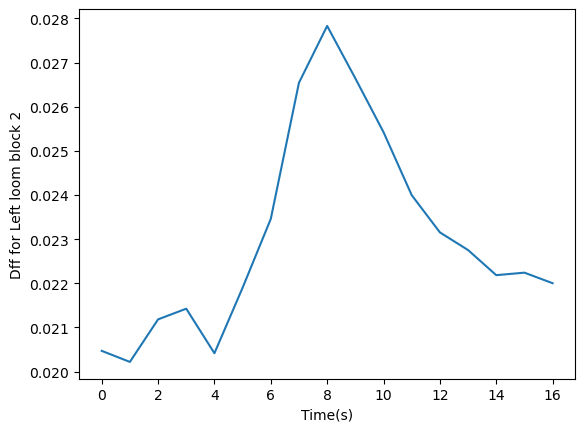

In [599]:
xleft = llt.mean(axis=0)
plt.plot(xleft)
plt.xlabel('Time(s)')
plt.ylabel('Dff for Left loom block 2')
plt.show()

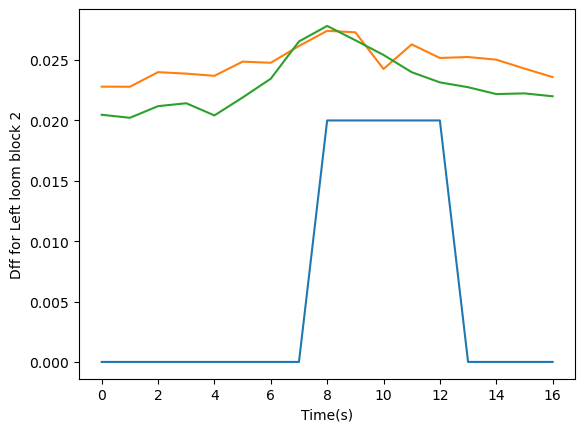

In [600]:
xleft = llt.mean(axis=0)
plt.plot(stimuli[7, indx+1:(indx*2) + 1][-index2:]/50)
plt.plot(np.mean(loom_pd.to_numpy(),0))
plt.plot(xleft)
plt.xlabel('Time(s)')
plt.ylabel('Dff for Left loom block 2')
plt.show()

In [517]:
# Creating the right loom
index2 = indx//8
loom_right = pd.DataFrame(pdd.to_numpy()[:,-(index2*2):-index2])
loom_right

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.028611,0.051049,0.036061,0.056978,0.062233,0.069916,0.048009,0.070056,0.063175,0.063085,0.076505,0.061276,0.072802,0.047277,0.068663,0.056325,0.044652
1,0.046232,0.047160,0.072655,0.078381,0.101479,0.106239,0.086668,0.090791,0.104641,0.095376,0.087893,0.088170,0.081275,0.086862,0.082108,0.066296,0.081159
2,0.008165,0.011395,0.006137,0.006934,0.011942,0.010838,0.011887,0.013845,0.015671,0.016860,0.021947,0.012529,0.007119,0.012549,0.020300,0.012447,0.014509
3,0.061392,0.066323,0.076761,0.090408,0.104736,0.114475,0.125048,0.094836,0.098917,0.103817,0.122175,0.095107,0.098186,0.082976,0.086250,0.070702,0.064211
4,0.018852,0.039405,0.051528,0.040741,0.051329,0.075908,0.067285,0.071700,0.067422,0.070601,0.052293,0.060269,0.055015,0.048256,0.056702,0.057693,0.052223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278646,0.025626,0.015978,0.012962,0.028596,0.028681,0.020517,0.011879,0.017732,0.024229,0.013753,0.012794,0.017120,0.015902,0.019067,0.021866,0.022115,0.021072
278647,0.023782,0.032396,0.053706,0.048906,0.060647,0.061509,0.055292,0.051485,0.062715,0.043812,0.050798,0.040527,0.050631,0.038761,0.041886,0.042511,0.038109
278648,0.017310,0.020524,0.009262,0.012754,0.014438,0.008617,0.015269,0.011252,0.009781,0.010280,0.009933,0.015317,0.006450,0.012416,0.008302,0.011634,0.012015
278649,0.013573,0.024060,0.031393,0.034422,0.038389,0.038955,0.033911,0.032556,0.028678,0.021033,0.032047,0.024869,0.031061,0.027139,0.027804,0.016158,0.027438


In [518]:
right_loom_tectum = []
for i in tectum_ones:
    right_loom_tectum.append(list(loom_right.to_numpy()[i,:]))
rlt = np.array(right_loom_tectum)
pd.DataFrame(rlt)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.003719,0.003311,0.010292,0.015148,0.012206,0.006865,0.008685,0.017703,0.022531,0.023254,0.015735,0.013191,0.010269,0.001158,0.013398,0.007791,0.023462
1,0.006303,0.004059,0.005470,0.011690,0.017830,0.010634,0.012603,0.021346,0.026989,0.019865,0.025765,0.015175,0.014882,0.020479,0.027006,0.007902,0.022204
2,0.011143,0.022496,0.003521,0.010936,0.016027,0.017660,0.032553,0.032895,0.025725,0.029470,0.025141,0.037131,0.040670,0.023226,0.018581,0.011393,0.009847
3,0.022102,0.028499,0.038601,0.034753,0.032134,0.015002,0.020120,0.032872,0.040175,0.014363,0.018354,0.022362,0.010199,0.025863,0.026506,0.010443,0.020373
4,0.022109,0.019723,0.024282,0.020391,0.019822,0.024397,0.031055,0.039258,0.047288,0.036672,0.035430,0.030270,0.025176,0.031743,0.037413,0.020958,0.020752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36815,0.011337,0.027488,0.025884,0.015608,0.034401,0.024123,0.031713,0.015224,0.026762,0.029808,0.015745,0.020548,0.024367,0.026094,0.023166,0.012187,0.024622
36816,0.136192,0.138162,0.156017,0.109449,0.124771,0.103768,0.133170,0.119198,0.117695,0.114874,0.096527,0.085064,0.085603,0.057446,0.097312,0.142366,0.116536
36817,0.021462,0.017781,0.022684,0.016132,0.011345,0.015594,0.016426,0.025187,0.016221,0.017316,0.013751,0.014723,0.029112,0.006898,0.019276,0.020605,0.011432
36818,0.022305,0.018255,0.011161,0.019700,0.025649,0.021114,0.019908,0.018284,0.023769,0.020566,0.017417,0.016998,0.017009,0.029115,0.020612,0.018667,0.024737


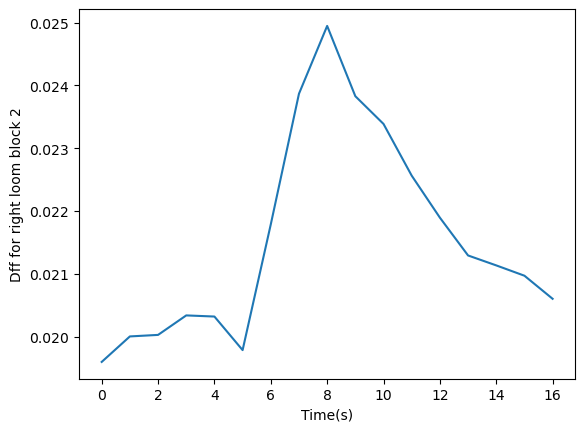

In [601]:
xright = rlt.mean(axis=0)
plt.plot(xright)
plt.xlabel('Time(s)')
plt.ylabel('Dff for right loom block 2')
plt.show()

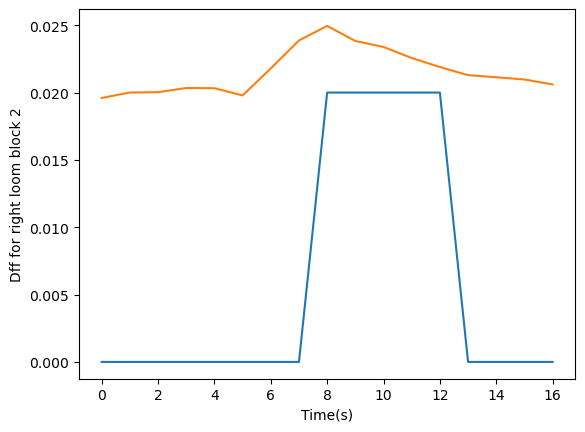

In [615]:
xright = rlt.mean(axis=0)
plt.plot(stimuli[6, indx+1:(indx*2) + 1][-(index2*2):-index2]/50)
# plt.plot(np.mean(loom_right.to_numpy(),0))
plt.plot(xright)
plt.xlabel('Time(s)')
plt.ylabel('Dff for right loom block 2')
plt.show()

In [617]:
stimuli[6, indx+1:(indx*2) + 1][-(index2*2):-index2].shape

(17,)

In [462]:
brain_regions

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278647,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
278649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


<BarContainer object of 112 artists>

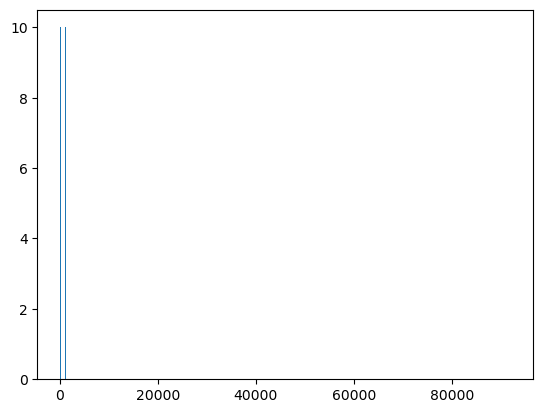

In [471]:
numbers_expressed = brain_regions.to_numpy().sum(axis=0)
plt.bar(numbers_expressed, 10)

([<matplotlib.axis.XTick at 0x7f8e7042da80>,
  ...],
 [Text(0, 0, '1'),
  Text(91, 0, '92'),
  Text(182, 0, '183'),
  Text(273, 0, '274'),
  Text(364, 0, '365'),
  Text(455, 0, '456'),
  Text(546, 0, '547'),
  Text(637, 0, '638'),
  Text(728, 0, '729'),
  Text(819, 0, '820'),
  Text(910, 0, '911'),
  Text(1001, 0, '1002'),
  Text(1092, 0, '1093'),
  Text(1183, 0, '1184'),
  Text(1274, 0, '1275'),
  Text(1365, 0, '1366'),
  Text(1456, 0, '1457'),
  Text(1547, 0, '1548'),
  Text(1638, 0, '1639'),
  Text(1729, 0, '1730'),
  Text(1820, 0, '1821'),
  Text(1911, 0, '1912'),
  Text(2002, 0, '2003'),
  Text(2093, 0, '2094'),
  Text(2184, 0, '2185'),
  Text(2275, 0, '2276'),
  Text(2366, 0, '2367'),
  Text(2457, 0, '2458'),
  Text(2548, 0, '2549'),
  Text(2639, 0, '2640'),
  Text(2730, 0, '2731'),
  Text(2821, 0, '2822'),
  Text(2912, 0, '2913'),
  Text(3003, 0, '3004'),
  Text(3094, 0, '3095'),
  Text(3185, 0, '3186'),
  Text(3276, 0, '3277'),
  Text(3367, 0, '3368'),
  Text(3458, 0, '3459'),


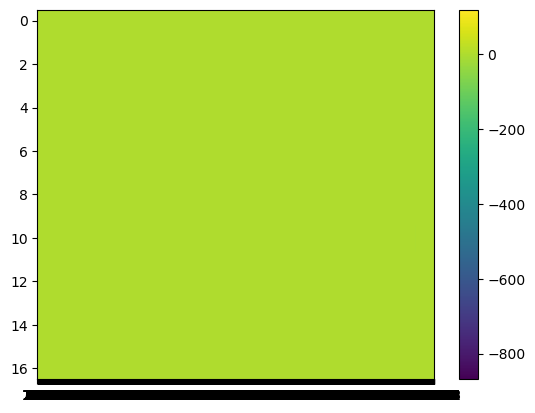

In [604]:
fig = plt.figure()
b   = plt.imshow(loom_pd.T, aspect='auto')
fig.colorbar(b)
plt.xticks(range(0,n,91),range(1,n+1,91))

In [618]:
D, T = loom_pd.shape
print(D, T)

278651 17
